##### Select only the data from february

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the CSV file
file_path = r'MetroPT3(AirCompressor).csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Convert the first column to datetime
data.iloc[:, 1] = pd.to_datetime(data.iloc[:, 1], format='%Y-%m-%d %H:%M:%S')

testdf = data[:1295984]#[445298:1295984] #April to July
testdf["timestamp"] = pd.to_datetime(testdf["timestamp"], format="%d/%m/%Y %H:%M:%S")

testdf.tail(5)

C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_13960\3793407752.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["timestamp"] = pd.to_datetime(testdf["timestamp"], format="%d/%m/%Y %H:%M:%S")


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1295979,12959790,2020-07-31 23:59:12,-0.012,9.866,9.854,-0.018,9.866,71.050,3.9200,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1295980,12959800,2020-07-31 23:59:22,-0.012,9.846,9.834,-0.020,9.844,70.950,3.9600,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1295981,12959810,2020-07-31 23:59:32,-0.012,9.822,9.810,-0.018,9.822,70.850,3.9125,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1295982,12959820,2020-07-31 23:59:42,-0.010,9.802,9.790,-0.020,9.802,70.850,3.8475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1295983,12959830,2020-07-31 23:59:52,-0.012,9.782,9.768,-0.020,9.780,70.825,3.8450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [2]:
'''# Filter the DataFrame for the date 2020-04-01
filtered_df = testdf[(testdf['timestamp'] >= '2020-07-17') & (testdf['timestamp'] < '2020-07-19')]

# Plot the 'TP2' column for the filtered date
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['TP3'], marker='.', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('TP2')
plt.title('TP2 for the Day 2020-04-01')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()'''

"# Filter the DataFrame for the date 2020-04-01\nfiltered_df = testdf[(testdf['timestamp'] >= '2020-07-17') & (testdf['timestamp'] < '2020-07-19')]\n\n# Plot the 'TP2' column for the filtered date\nplt.figure(figsize=(12, 6))\nplt.plot(filtered_df['timestamp'], filtered_df['TP3'], marker='.', linestyle='-')\nplt.xlabel('Timestamp')\nplt.ylabel('TP2')\nplt.title('TP2 for the Day 2020-04-01')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show()"

#### Determine the minima and maxima

In [3]:
# Determining the maxima and minima
n = 15  # Number of neighbors to consider on each side

# Extract the second column (TP3)
tp3 = testdf.iloc[:, 3].values  # Second column as a NumPy array

# Initialize lists to store indices of maxima and minima
maxima_indices = []
minima_indices = []

# Iterate through the data points
for i in range(n, len(tp3) - n):
    # Get the neighborhood
    neighborhood = tp3[i - n:i + n + 1]
    
    # Check for maximum
    if tp3[i] == max(neighborhood):
        # Ensure the current index is the most recent occurrence of the maximum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            maxima_indices.append(i)
    
    # Check for minimum
    if tp3[i] == min(neighborhood):
        # Ensure the current index is the most recent occurrence of the minimum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            minima_indices.append(i)

# Output results
print(f"Maxima indices: {maxima_indices}")
print(f"Minima indices: {minima_indices}")
print(len(maxima_indices))
print(len(minima_indices))

'''
export_data = pd.DataFrame({
    'Minima Indices': pd.Series(minima_indices),
    'Maxima Indices': pd.Series(maxima_indices)
})

# Export the DataFrame to a CSV file
export_data.to_csv('maxima_minima_indices.csv', index=False)
'''


Maxima indices: [151, 357, 559, 763, 966, 1166, 1369, 1548, 1726, 1908, 2056, 2252, 2386, 2496, 2687, 2869, 3017, 3225, 3345, 3534, 3746, 3904, 4152, 4382, 4604, 4791, 5005, 5199, 5395, 5527, 5632, 5847, 5927, 6067, 6243, 6403, 6539, 6762, 6908, 7047, 7114, 7147, 7358, 7426, 7635, 7814, 7997, 8157, 8289, 8452, 8585, 8811, 8937, 9100, 9277, 9488, 9583, 9781, 9950, 10104, 10287, 10448, 10666, 10807, 10988, 11100, 11320, 11455, 11622, 11798, 11975, 12135, 12306, 12474, 12681, 12900, 13083, 13257, 13438, 13610, 13784, 13956, 14129, 14302, 14474, 14646, 14820, 14994, 15170, 15340, 15513, 15686, 15860, 16035, 16208, 16383, 16559, 16735, 16922, 17122, 17324, 17527, 17732, 17937, 18106, 18311, 18515, 18722, 18925, 19130, 19334, 19537, 19745, 19949, 20169, 20356, 20633, 20885, 21127, 21367, 21600, 21852, 22103, 22349, 22590, 22843, 23070, 23326, 23577, 23831, 24083, 24339, 24581, 24817, 25079, 25171, 25307, 25523, 25653, 25857, 26015, 26245, 26437, 26612, 26865, 26999, 27267, 27439, 27654, 2780

"\nexport_data = pd.DataFrame({\n    'Minima Indices': pd.Series(minima_indices),\n    'Maxima Indices': pd.Series(maxima_indices)\n})\n\n# Export the DataFrame to a CSV file\nexport_data.to_csv('maxima_minima_indices.csv', index=False)\n"

#### Plotting TP3 against the indices

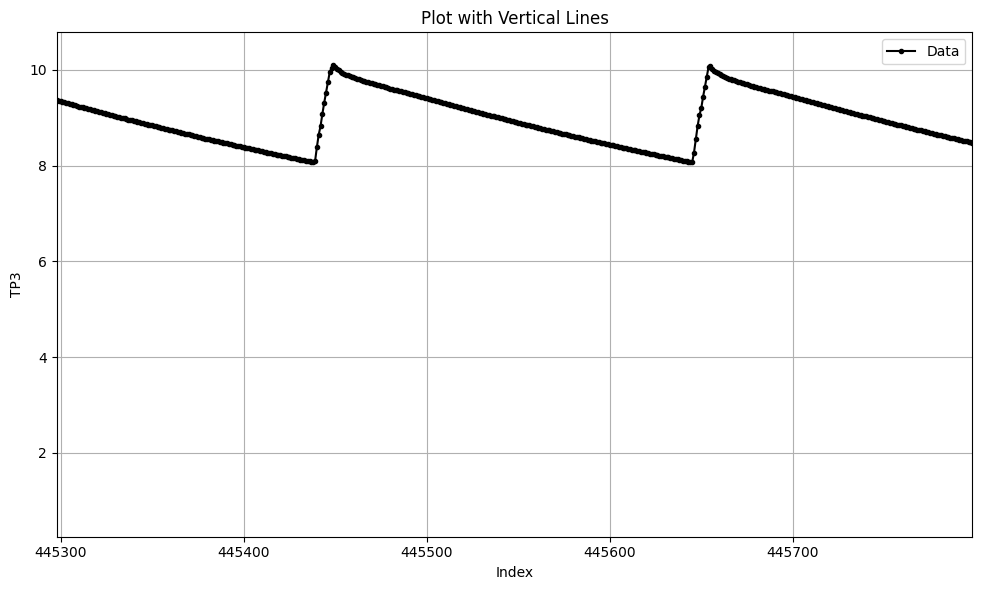

In [4]:
plt.figure(figsize=(10, 6))
# Extract the first and third columns
#x = data.iloc[:400, 0]  # First column (datetime)
aux = 856832-445298
x = range(445298, 445298+testdf.shape[0])
y = testdf.iloc[:, 3]  # Third column
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')


'''# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=idx, color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=idx, color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")'''

# Add labels, title, and grid
plt.xlabel('Index')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
#tick_spacing = 100  # Adjust this for denser or sparser ticks
#ticks = range(aux, aux + 1000 + 1, tick_spacing)
#plt.xticks(ticks, rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.xlim(0+445298, 500+445298)


# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Converting the timestamp insto seconds since first measurement (01/02/2020  00:00:00)

In [5]:
# Calculate seconds since the first entry
timestart = testdf["timestamp"].iloc[0]
testdf["timestamp"] = (testdf["timestamp"] - testdf["timestamp"].iloc[0]).dt.total_seconds()
print(timestart)

2020-02-01 00:00:00


C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_13960\576912012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["timestamp"] = (testdf["timestamp"] - testdf["timestamp"].iloc[0]).dt.total_seconds()


c:\Users\JoãoMarquesDias\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


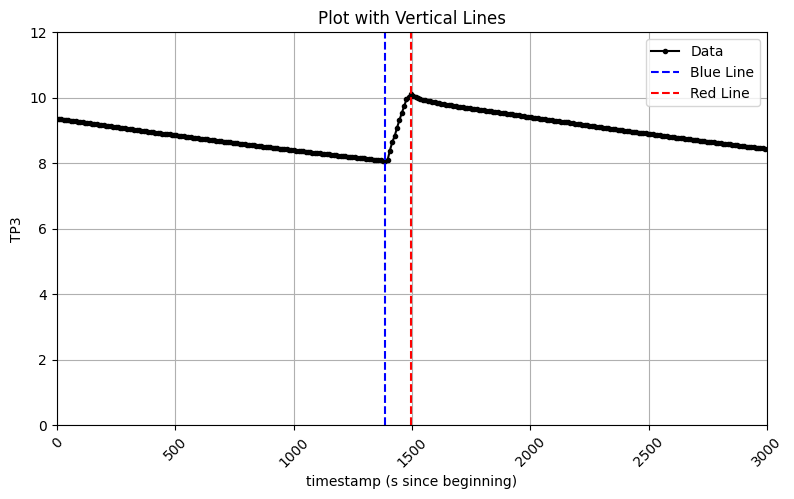

In [6]:
aux=0
x = testdf.iloc[aux:aux+4000, 1] #Timestamp
y = testdf.iloc[aux:aux+4000, 3] #TP3
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
aux=0
plt.xlim(0, 3000)
plt.ylim(0, 12)

# Show the plot
plt.show()

#### Calculating $T_{run}$ and $T_{idle}$ vectors

In [7]:
# Assuming maxima_indices and minima_indices are lists of indices
# Assuming timestamps is a list or array of timestamps corresponding to the indices

def compute_trun_tidle(testdf, maxima_indices, minima_indices):
    # Initialize lists to store Trun and Tidle values
    Trun = []
    trun = []

    Tidle = []
    tidle = []

    # Compute Trun
    for max_idx in maxima_indices:
        # Find the closest minima index with a smaller index value
        valid_minima_indices = [min_idx for min_idx in minima_indices if min_idx < max_idx]
        if valid_minima_indices:
            closest_min_idx = max(valid_minima_indices)
            trun_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Trun.append(trun_value)
            trun.append(testdf.iloc[closest_min_idx, 1])
        
        valid_minima_indices_2 = [min_idx for min_idx in minima_indices if min_idx > max_idx]
        if valid_minima_indices_2:
            closest_min_idx = min(valid_minima_indices_2)
            tidle_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Tidle.append(tidle_value)
            tidle.append(testdf.iloc[closest_min_idx, 1])
        

    return Trun, Tidle, trun, tidle

Trun, Tidle, trun, tidle = compute_trun_tidle(testdf, maxima_indices, minima_indices)

print("Trun:", Trun)
print('trun:', trun,'\n')
print("Tidle:", Tidle)
print('tidle:', tidle) 

Trun: [np.float64(109.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(100.0), np.float64(100.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(100.0), np.float64(119.0), np.float64(100.0), np.float64(109.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(109.0), np.float64(100.0), np.float64(99.0), np.float64(89.0), np.float64(119.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(110.0), np.float64(109.0), np.float64(109.0), np.float64(110.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(12929.0), np.float64(30.0), np.float64(139.0), np.float64(109.0), np.float64(89.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(119.0), n

#### Creating coordinates for box centers

In [8]:
Box_centers = np.zeros((min(len(Trun), len(Tidle)), 7))
Trun_fixed = []
Tidle_fixed = []

# Populate the matrix
for i in range(Box_centers.shape[0]):
    Trun_aux = Trun[i]
    Tidle_aux = Tidle[i]
    
    # First two components: Trun_1 * (1/4, 3/4)
    Box_centers[i, 0] = trun[i] + Trun_aux * (1 / 4)
    Box_centers[i, 1] = trun[i] + Trun_aux * (3 / 4)
    


    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    valid_tidle_indices = [k for k in range(len(Tidle)) if tidle[k] > trun[i]]
    if valid_tidle_indices:
        k = min(valid_tidle_indices)
        for j, fraction in enumerate(fractions, start=2):
            Box_centers[i, j] = trun[i] + Trun_aux + Tidle[k] * fraction   

    '''   # Remaining five components: Tidle_1 * (1/10, 3/10, 5/10, 7/10, 9/10)
    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    for j, fraction in enumerate(fractions, start=2):
        Box_centers[i, j] = trun[i] + Trun_aux +  * fraction'''

#### Plotting graph with box centres

In [9]:
Box_centers[0,:]

array([1415.25, 1469.75, 1691.2 , 2079.6 , 2468.  , 2856.4 , 3244.8 ])

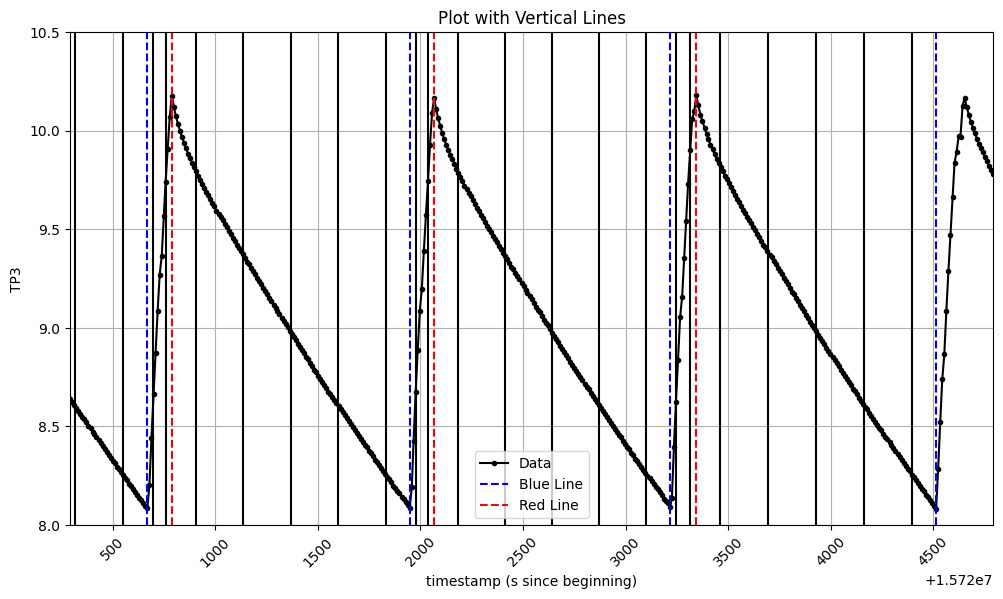

In [10]:
x = testdf.iloc[:, 1]#range(testdf.shape[0]) #Timestamp
y = testdf.iloc[:, 3] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Plot red vertical lines
for i in range(Box_centers.shape[0]):    
    for idx in Box_centers[i, :]:
        plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
plt.xlim(15720292, 15724792)
plt.ylim(8,10.5)

# Show the plot
plt.show()

#### Determining $B_n(TP3)$

In [11]:
Boxes_tp3_flattened = []
Boxes_tp3_flattened.append(float(testdf.iloc[143, 3])) #See first value by eye
Box_centers_flattened = Box_centers.flatten().tolist()

for i in range(1, len(Box_centers_flattened)-1):
    flag_min=1e5
    aux = 0
    for j in testdf[(testdf['timestamp']>=Box_centers_flattened[i-1]) & (testdf['timestamp']<=Box_centers_flattened[i+1])]['timestamp'].to_list():
        if abs(Box_centers_flattened[i] - j) < flag_min:
            flag_min = abs(Box_centers_flattened[i] - j)
            aux = j
    Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))

Boxes_tp3_flattened.append(float(testdf.iloc[1295955, 3])) #See last one by eye
print(len(Boxes_tp3_flattened)/7)
#Unflatten the list
Boxes_tp3 = np.reshape(Boxes_tp3_flattened, (Box_centers.shape[0], 7))



C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_13960\195983790.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))


9666.0


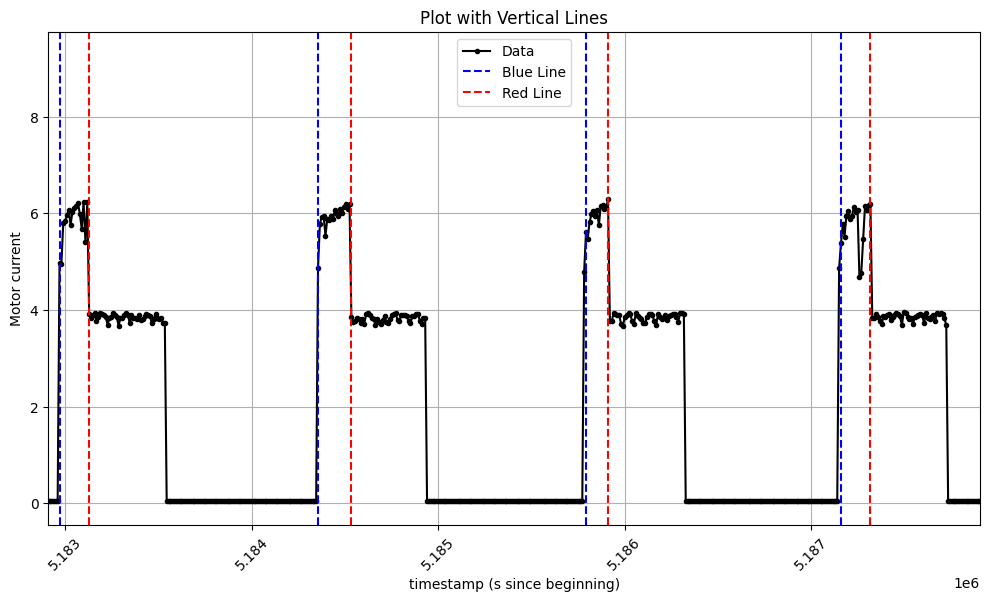

In [12]:
x = testdf.iloc[:, 1] #Timestamp
y = testdf.iloc[:, 8] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Plot red vertical lines
for idx in Box_centers[0, :]:
    plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('Motor current')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
plt.xlim(5182907, 5187907)

# Show the plot
plt.show()

#### Determining $B_n(Mc)$

In [13]:
Boxes_mc_flattened = []
Boxes_mc_flattened.append(float(testdf.iloc[143,8])) #See first value by eye

for i in range(1, len(Box_centers_flattened)-1):
    flag_min=1e5
    aux = 0
    for j in testdf[(testdf['timestamp']>=Box_centers_flattened[i-1]) & (testdf['timestamp']<=Box_centers_flattened[i+1])]['timestamp'].to_list():
        if abs(Box_centers_flattened[i] - j) < flag_min:
            flag_min = abs(Box_centers_flattened[i] - j)
            aux = j
    Boxes_mc_flattened.append(float(testdf[testdf['timestamp'] == aux]['Motor_current']))

Boxes_mc_flattened.append(float(testdf.iloc[1295955, 8])) #See last one by eye

Boxes_mc = np.reshape(Boxes_mc_flattened, (Box_centers.shape[0], 7))



C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_13960\2949431210.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_mc_flattened.append(float(testdf[testdf['timestamp'] == aux]['Motor_current']))


In [14]:
Boxes_tp3.shape

(9666, 7)

In [15]:
from datetime import datetime

# Corrected datetime format
(datetime(2020, 6, 30, 23, 26, 26).timestamp() - timestart.timestamp())

13040786.0

#### Creating the February/July dataset

In [16]:
# Reshape Trun and Tidle to be 2-dimensional arrays
Tidle_reshaped = np.array(Tidle).reshape(-1, 1)
Trun_reshaped = np.array(Trun).reshape(-1, 1)

# Concatenate the arrays
X_test_analog = pd.DataFrame(np.hstack((Boxes_tp3, Boxes_mc, Trun_reshaped, Tidle_reshaped)), columns=['TP3_1', 'TP3_2', 'TP3_3', 'TP3_4', 'TP3_5' ,'TP3_6', 'TP3_7', 'MC_1', 'MC_2', 'MC_3', 'MC_4', 'MC_5', 'MC_6', 'MC_7', 'Trun', 'Tidle'])

In [17]:
# Convert trun values to timestamps
timestamps = [pd.to_datetime(i + timestart.timestamp(), unit='s') for i in trun]

# Add the new column to X_test_analog
X_test_analog['timestamp'] = timestamps

# Display the updated DataFrame
X_test_analog.head()

,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,timestamp
0,8.642,9.736,9.728,9.320,8.926,8.558,8.228,6.0500,6.1500,3.8550,0.04,0.0400,0.0400,0.0375,109.0,1942.0,2020-02-01 00:23:08
1,8.552,9.644,9.706,9.300,8.914,8.556,8.218,5.9800,6.1925,3.8600,0.04,0.0400,0.0375,0.0400,99.0,1903.0,2020-02-01 00:57:19
2,8.474,9.788,9.716,9.308,8.912,8.540,8.210,6.0575,6.1600,3.7925,0.04,0.0400,0.0400,0.0400,99.0,1923.0,2020-02-01 01:30:41
3,8.720,9.858,9.710,9.300,8.920,8.556,8.222,6.0600,6.0875,4.0350,0.04,0.0375,0.0400,0.0400,99.0,1912.0,2020-02-01 02:04:23
4,8.506,9.602,9.716,9.318,8.928,8.566,8.238,5.9725,6.2700,4.0050,0.04,0.0375,0.0400,0.0400,100.0,1883.0,2020-02-01 02:37:54


$$\bold{X}_{Analog} = \left(B_1(TP3), B_2(TP3), ..., B_7(TP3);\quad B_1(Mc), ..., B_7(Mc);\quad T_{run}, T_{idle}\right)$$

$$\bold{X}_{Digi} =  \left(\sum_{T_{cycle}}D_1, \sum_{T_{cycle}}D_2, ..., \sum_{T_{cycle}}D_7;\quad T_{run}, T_{idle}\right)$$

#### Check which lines of $X^{test}_{analog}$ are normal and which are anomalous

In [18]:
from datetime import datetime

# Define the intervals as a list of tuples (start_timestamp, end_timestamp)
# The datetime() function expects the date format as: datetime(year, month, day, hour, minute)
anomaly_flag = []
intervals = [
    (datetime(2020, 4, 12, 11, 50), datetime(2020, 4, 12, 23, 30)),
    (datetime(2020, 4, 18, 0, 0), datetime(2020, 4, 18, 23, 59)),
    (datetime(2020, 4, 19, 0, 0), datetime(2020, 4, 19, 1, 30)),
    (datetime(2020, 4, 29, 3, 20), datetime(2020, 4, 29, 4, 0)),
    (datetime(2020, 4, 29, 22, 0), datetime(2020, 4, 29, 22, 20)),

    (datetime(2020, 5, 13, 14, 0), datetime(2020, 5, 13, 23, 59)),
    (datetime(2020, 5, 18, 5, 0), datetime(2020, 5, 18, 5, 30)),
    (datetime(2020, 5, 19, 10, 10), datetime(2020, 5, 19, 11, 0)),
    (datetime(2020, 5, 19, 22, 10), datetime(2020, 5, 19, 23, 59)),
    (datetime(2020, 5, 20, 0, 0), datetime(2020, 5, 20, 20, 0)),
    (datetime(2020, 5, 23, 9, 50), datetime(2020, 5, 23, 10, 10)),
    (datetime(2020, 5, 29, 23, 30), datetime(2020, 5, 29, 23, 59)),
    (datetime(2020, 5, 30, 0, 0), datetime(2020, 5, 30, 6, 0)),
    (datetime(2020, 6, 1, 15, 0), datetime(2020, 6, 1, 15, 40)),
    (datetime(2020, 6, 3, 10, 0), datetime(2020, 6, 3, 11, 0)),
    (datetime(2020, 6, 5, 10, 0), datetime(2020, 6, 5, 23, 59)),
    (datetime(2020, 6, 6, 0, 0), datetime(2020, 6, 6, 23, 59)),
    (datetime(2020, 6, 7, 0, 0), datetime(2020, 6, 7, 14, 30)),

    (datetime(2020, 7, 8, 17, 30), datetime(2020, 7, 8, 19, 0)),
    (datetime(2020, 7, 15, 14, 30), datetime(2020, 7, 15, 19, 0)),
    (datetime(2020, 7, 17, 4, 30), datetime(2020, 7, 17, 5, 30))
]

# Function to check if a timestamp is in any of the intervals
def is_timestamp_in_intervals(timestamp, intervals):
    for start, end in intervals:
        if start <= timestamp <= end:
            return True
    return False


for i in trun:
    timestamp = pd.to_datetime(i + timestart.timestamp(), unit='s')
    in_interval = 1 if is_timestamp_in_intervals(timestamp, intervals) else 0
    if i!=trun[-1]:
        anomaly_flag.append(in_interval)#[timestamp, in_interval])

In [19]:
len(anomaly_flag)

9665

In [20]:
timesteps = []
for i in trun:
    timesteps.append(pd.to_datetime(i + timestart.timestamp(), unit='s'))

# Concatenate the DataFrames horizontally
X_analog_feb_july = pd.concat([pd.DataFrame(X_test_analog),
                       #pd.DataFrame(timesteps[:-1], columns=['Timestamp']),
                       pd.DataFrame(anomaly_flag[:], columns=['anomaly_flag'])], axis=1)

X_analog_feb_july = X_analog_feb_july.iloc[:-1,:]


In [21]:
X_analog_feb_july.tail(5)

,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,timestamp,anomaly_flag
9660,8.674,9.874,9.798,9.380,8.980,8.604,8.262,5.8650,6.0800,3.8750,3.8425,0.0400,0.0400,0.04,129.0,1169.0,2020-07-31 21:46:33,0.0
9661,8.628,9.752,9.794,9.374,8.988,8.606,8.260,5.9300,6.0975,3.9150,3.8425,0.0375,0.0400,0.04,129.0,1160.0,2020-07-31 22:08:11,0.0
9662,8.618,9.690,9.802,9.378,8.974,8.594,8.254,6.0100,6.1900,3.8425,3.9250,0.0400,0.0375,0.04,119.0,1170.0,2020-07-31 22:29:40,0.0
9663,8.662,9.742,9.794,9.374,8.982,8.604,8.260,5.8650,6.1050,3.9200,3.9450,0.0400,0.0400,0.04,119.0,1160.0,2020-07-31 22:51:09,0.0
9664,8.676,9.746,9.786,9.364,8.972,8.608,8.264,5.9175,6.1450,3.8475,3.9200,0.0375,0.0400,0.04,119.0,1149.0,2020-07-31 23:12:28,0.0


In [22]:
np.save("npy_files/X_analog_feb_july.npy", X_analog_feb_july)

# ____________________________________________________________________________________________________________________

# Prepare data for LSTM approach

$$\bold{X} = \begin{pmatrix}
B_1(TP3) & B_2(TP3) & ... & B_7(TP3)\\
B_1(Mc) & B_2(Mc) & ... & B_7(Mc)\\
\sum_{B_1}D_1 & \sum_{B_2}D_1 & ... & \sum_{B_7}D_1\\
\vdots & \vdots & \ddots & \vdots\\
\sum_{B_1}D_7 & \sum_{B_2}D_7 & ... & \sum_{B_7}D_7\\
\end{pmatrix}$$

In [23]:
import numpy as np

# Function to sum entries in the specified intervals
def sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle):
    index_list = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Caudal_impulses']
    X_lstm = np.zeros((len(trun) - 1, 7, 9))  # Initialize the array with the correct shape
    
    for i in range(len(trun) - 1):
        for j in index_list:
            aux = index_list.index(j)

            interval1_start = trun[i]
            interval1_end = trun[i] + Trun[i] / 2

            interval2_start = interval1_end
            interval2_end = trun[i] + Trun[i]

            interval3_start = trun[i] + Trun[i]
            interval3_end = trun[i] + Trun[i] + Tidle[i] / 5

            interval4_start = interval3_end
            interval4_end = trun[i] + Trun[i] + (2/5)*Tidle[i]

            interval5_start = interval4_end
            interval5_end = trun[i] + Trun[i] + (3/5)*Tidle[i]

            interval6_start = interval5_end
            interval6_end = trun[i] + Trun[i] + (4/5)*Tidle[i]

            interval7_start = interval6_end
            interval7_end = trun[i] + Trun[i] + Tidle[i]

            sum_interval1 = testdf[(testdf['timestamp'] > interval1_start) & (testdf['timestamp'] <= interval1_end)][j].sum()
            sum_interval2 = testdf[(testdf['timestamp'] > interval2_start) & (testdf['timestamp'] <= interval2_end)][j].sum()
            sum_interval3 = testdf[(testdf['timestamp'] > interval3_start) & (testdf['timestamp'] <= interval3_end)][j].sum()
            sum_interval4 = testdf[(testdf['timestamp'] > interval4_start) & (testdf['timestamp'] <= interval4_end)][j].sum()
            sum_interval5 = testdf[(testdf['timestamp'] > interval5_start) & (testdf['timestamp'] <= interval5_end)][j].sum()
            sum_interval6 = testdf[(testdf['timestamp'] > interval6_start) & (testdf['timestamp'] <= interval6_end)][j].sum()
            sum_interval7 = testdf[(testdf['timestamp'] > interval7_start) & (testdf['timestamp'] <= interval7_end)][j].sum()

            X_lstm[i, 0, aux+2] = sum_interval1
            X_lstm[i, 1, aux+2] = sum_interval2
            X_lstm[i, 2, aux+2] = sum_interval3
            X_lstm[i, 3, aux+2] = sum_interval4
            X_lstm[i, 4, aux+2] = sum_interval5
            X_lstm[i, 5, aux+2] = sum_interval6
            X_lstm[i, 6, aux+2] = sum_interval7
    
    return X_lstm

# Calculate the sums
X_lstm = sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle)

In [24]:
pd.DataFrame(X_lstm[7,:7,:])

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,4.0
1,0.0,0.0,0.0,6.0,5.0,0.0,0.0,6.0,6.0
2,0.0,0.0,33.0,0.0,33.0,33.0,0.0,33.0,33.0
3,0.0,0.0,34.0,0.0,34.0,34.0,0.0,34.0,34.0
4,0.0,0.0,33.0,0.0,33.0,33.0,0.0,33.0,33.0
5,0.0,0.0,34.0,0.0,34.0,34.0,0.0,34.0,34.0
6,0.0,0.0,33.0,1.0,33.0,33.0,0.0,34.0,34.0


In [25]:
for i in range(len(Trun)-1):
    X_lstm[i, :, 0] = X_analog_feb_july.iloc[i,:7].values
    X_lstm[i, :, 1] = X_analog_feb_july.iloc[i,7:14].values

In [26]:
print(np.array2string(X_lstm[:5,:,0], formatter={'float_kind': lambda x: f"{x:.4f}"}))

[[8.6420 9.7360 9.7280 9.3200 8.9260 8.5580 8.2280]
 [8.5520 9.6440 9.7060 9.3000 8.9140 8.5560 8.2180]
 [8.4740 9.7880 9.7160 9.3080 8.9120 8.5400 8.2100]
 [8.7200 9.8580 9.7100 9.3000 8.9200 8.5560 8.2220]
 [8.5060 9.6020 9.7160 9.3180 8.9280 8.5660 8.2380]]


In [27]:
anomaly_list = X_analog_feb_july['anomaly_flag'].values

In [28]:
len(anomaly_list)

9665

In [29]:
np.unique(X_analog_feb_july['anomaly_flag'])

array([0., 1.])

In [30]:
np.save("npy_files/X_lstm.npy", X_lstm)
np.save("npy_files/anomaly_list.npy", anomaly_list)

In [67]:
pd.DataFrame(X_lstm[0, :, :]).T

,0,1,2,3,4,5,6
0,8.642,9.736,9.728,9.32,8.926,8.558,8.2280
1,6.050,6.150,3.855,0.04,0.040,0.040,0.0375
2,0.000,1.000,39.000,39.00,39.000,39.000,39.0000
3,5.000,5.000,0.000,0.00,0.000,0.000,1.0000
4,2.000,5.000,39.000,39.00,39.000,39.000,39.0000
5,0.000,1.000,39.000,39.00,39.000,39.000,39.0000
6,0.000,0.000,0.000,0.00,0.000,0.000,0.0000
7,5.000,6.000,39.000,39.00,39.000,39.000,40.0000
8,5.000,6.000,39.000,39.00,39.000,39.000,40.0000


In [68]:

# Remove first two features (features 0 and 1)
X_trimmed = X_lstm[:, :, 2:]  # shape: (samples, timesteps, features_remaining)

# Transpose each sample to (timesteps, features_remaining) -> (samples, features_remaining, timesteps)
X_transposed = np.transpose(X_trimmed, (0, 2, 1))

# Flatten each sample row-wise (i.e., flatten features along timesteps)
X_flattened = X_transposed.reshape(X_lstm.shape[0], -1)

# View the result
pd.set_option('display.max_columns', None)
pd.DataFrame(X_flattened).head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,1.0,39.0,39.0,39.0,39.0,39.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,39.0,39.0,39.0,39.0,39.0,0.0,1.0,39.0,39.0,39.0,39.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0
1,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,38.0,38.0,39.0,38.0,39.0,0.0,1.0,38.0,38.0,39.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0
2,0.0,1.0,38.0,39.0,39.0,39.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,38.0,39.0,39.0,39.0,39.0,0.0,1.0,38.0,39.0,39.0,39.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0
3,0.0,1.0,38.0,39.0,38.0,39.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,38.0,39.0,38.0,39.0,39.0,0.0,1.0,38.0,39.0,38.0,39.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,38.0,39.0,38.0,39.0,39.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0
4,0.0,1.0,38.0,38.0,37.0,38.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,38.0,38.0,37.0,38.0,39.0,0.0,1.0,38.0,38.0,37.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0
5,0.0,1.0,38.0,39.0,38.0,39.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,38.0,39.0,38.0,39.0,38.0,0.0,1.0,38.0,39.0,38.0,39.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0
6,0.0,0.0,33.0,34.0,34.0,34.0,33.0,4.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,33.0,34.0,34.0,34.0,33.0,0.0,0.0,33.0,34.0,34.0,34.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,33.0,34.0,34.0,34.0,34.0,4.0,6.0,33.0,34.0,34.0,34.0,34.0


In [70]:
X_analog_feb_july = X_analog_feb_july.to_numpy()
X_input_v2 = np.concatenate([
    X_analog_feb_july[:, :-4],  #TP3
    X_flattened,
    X_analog_feb_july[:, -4:]
], axis=1)
pd.DataFrame(X_input_v2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,8.642,9.736,9.728,9.32,8.926,8.558,8.228,6.05,6.15,3.855,0.04,0.04,0.04,0.0375,0.0,1.0,39.0,39.0,39.0,39.0,39.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,39.0,39.0,39.0,39.0,39.0,0.0,1.0,39.0,39.0,39.0,39.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,109.0,1942.0,2020-02-01 00:23:08,0.0
1,8.552,9.644,9.706,9.3,8.914,8.556,8.218,5.98,6.1925,3.86,0.04,0.04,0.0375,0.04,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,38.0,38.0,39.0,38.0,39.0,0.0,1.0,38.0,38.0,39.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,99.0,1903.0,2020-02-01 00:57:19,0.0
2,8.474,9.788,9.716,9.308,8.912,8.54,8.21,6.0575,6.16,3.7925,0.04,0.04,0.04,0.04,0.0,1.0,38.0,39.0,39.0,39.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,38.0,39.0,39.0,39.0,39.0,0.0,1.0,38.0,39.0,39.0,39.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,99.0,1923.0,2020-02-01 01:30:41,0.0
3,8.72,9.858,9.71,9.3,8.92,8.556,8.222,6.06,6.0875,4.035,0.04,0.0375,0.04,0.04,0.0,1.0,38.0,39.0,38.0,39.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,38.0,39.0,38.0,39.0,39.0,0.0,1.0,38.0,39.0,38.0,39.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,38.0,39.0,38.0,39.0,39.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0,99.0,1912.0,2020-02-01 02:04:23,0.0
4,8.506,9.602,9.716,9.318,8.928,8.566,8.238,5.9725,6.27,4.005,0.04,0.0375,0.04,0.04,0.0,1.0,38.0,38.0,37.0,38.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,38.0,38.0,37.0,38.0,39.0,0.0,1.0,38.0,38.0,37.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,100.0,1883.0,2020-02-01 02:37:54,0.0


In [71]:
np.save("npy_files/X_input_v2.npy", X_input_v2)